In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile
import cv2
import os 
import numpy as np
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

### Extract all image data 

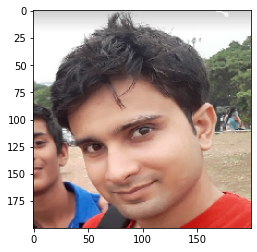

In [3]:
img = image.load_img("base_data/test/2.PNG" , target_size=(200, 200))
plt.imshow(img)

In [4]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get('accuracy') > .98) & (logs.get('val_accuracy') > .9):
            print("Reached 98% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        'base_data/train/',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = train_datagen.flow_from_directory(
        'base_data/validation/',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 43 images belonging to 2 classes.
Found 11 images belonging to 2 classes.


In [6]:
train_generator.class_indices

{'Not_happy': 0, 'happy': 1}

In [7]:
from tensorflow.keras.optimizers import RMSprop

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [9]:
history = model.fit(
      train_generator,
      steps_per_epoch=1,  
      epochs=20,
      validation_data = validation_generator,callbacks=[callbacks])


Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 1.0440 - accuracy: 0.5581 - val_loss: 0.8217 - val_accuracy: 0.4545
Epoch 2/20
1/1 [==============================] - 1s 957ms/step - loss: 0.5991 - accuracy: 0.6512 - val_loss: 0.3372 - val_accuracy: 1.0000
Epoch 3/20
Reached 98% accuracy so cancelling training!
1/1 [==============================] - 1s 948ms/step - loss: 0.2770 - accuracy: 1.0000 - val_loss: 0.2981 - val_accuracy: 1.0000


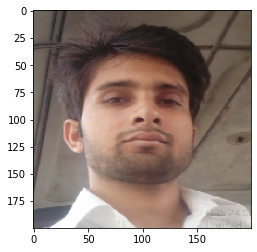

You ara not happy


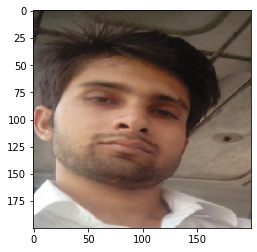

you are happy


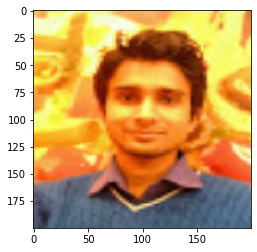

you are happy


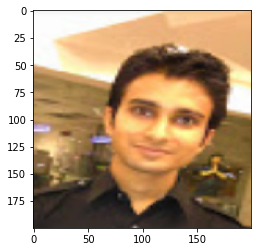

you are happy


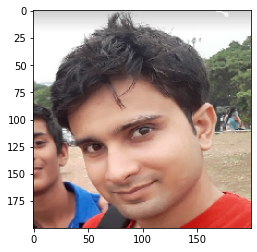

you are happy


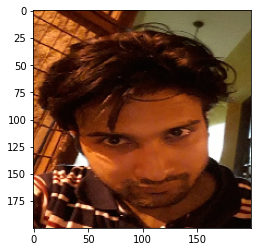

You ara not happy


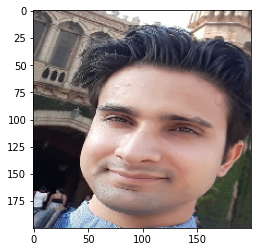

you are happy


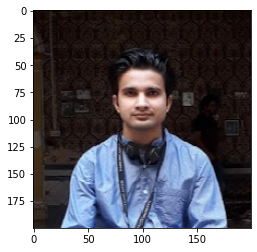

You ara not happy


In [10]:
dir_path = "base_data/test"
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+ '//' + i , target_size=(200, 200))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes =model.predict(images)
    if classes[0]==0:
        print("You ara not happy")
    else:
        print("you are happy")
